In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("observations.csv")

patient_ids = set()

for patient_id in data["PATIENT"]:
    patient_ids.add(patient_id)
patient_ids = list(patient_ids)
patient_ids.sort()

In [3]:
height_and_weight = pd.DataFrame(columns = ["patient_id", "Body Height", "Body Weight"])
height_and_weight["patient_id"] = patient_ids
height_and_weight.head()

,patient_id,Body Height,Body Weight
0,00185faa-2760-4218-9bf5-db301acf8274,NaN,NaN
1,0042862c-9889-4a2e-b782-fac1e540ecb4,NaN,NaN
2,0047123f-12e7-486c-82df-53b3a450e365,NaN,NaN
3,010d4a3a-2316-45ed-ae15-16f01c611674,NaN,NaN
4,01207ecd-9dff-4754-8887-4652eda231e2,NaN,NaN


In [4]:
patients_height = []
patients_weight = []
heights = []
weights = []

for index, row in data[["PATIENT", "DESCRIPTION", "VALUE"]].iterrows():
    if row["DESCRIPTION"] == "Body Height":
        patients_height.append(row["PATIENT"])
        heights.append(row["VALUE"])
    elif row["DESCRIPTION"] == "Body Weight":
        patients_weight.append(row["PATIENT"])
        weights.append(row["VALUE"])



In [5]:
for index, row in height_and_weight.iterrows():
    i = 0 
    j = 0
    for patient in patients_height:
        if row["patient_id"] == patient:
            
            height_and_weight.loc[height_and_weight.patient_id == patient, "Body Height"] = heights[i]
            
        i += 1
    for patient in patients_weight:
        if row["patient_id"] == patient:
            height_and_weight.loc[height_and_weight.patient_id == patient, "Body Weight"] = weights[j]
            
        j += 1

In [6]:
height_and_weight.head()

,patient_id,Body Height,Body Weight
0,00185faa-2760-4218-9bf5-db301acf8274,177.7,64.9
1,0042862c-9889-4a2e-b782-fac1e540ecb4,126.7,25.6
2,0047123f-12e7-486c-82df-53b3a450e365,176.5,87.6
3,010d4a3a-2316-45ed-ae15-16f01c611674,170.8,87.0
4,01207ecd-9dff-4754-8887-4652eda231e2,70.9,9.4


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(height_and_weight[["Body Height", "Body Weight"]])

pd.DataFrame(data_scaled).head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1
0,0.691564,-0.268611
1,-1.413982,-1.931338
2,0.642022,0.691794
3,0.406696,0.666409
4,-3.717697,-2.616737


In [14]:
K = 2
kmeans = KMeans(n_clusters = K, init = 'k-means++')

kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
kmeans.inertia_

714.7662998881096

Text(0, 0.5, 'Inertia')

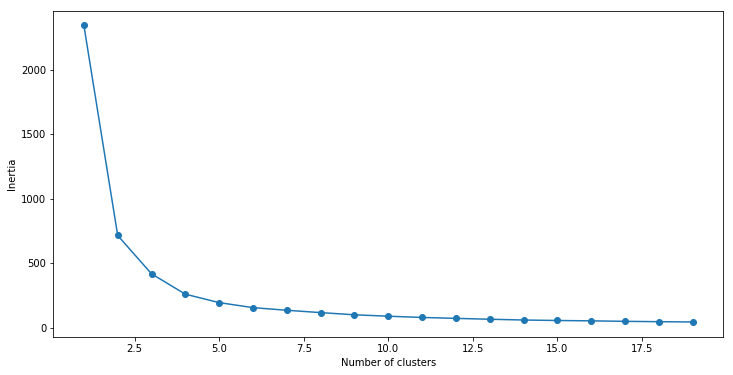

In [16]:
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init="k-means++")
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({"Cluster": range(1, 20), "SSE": SSE})
plt.figure(figsize = (12, 6))
plt.plot(frame["Cluster"], frame["SSE"], marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

In [18]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init = 'k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [19]:
frame = pd.DataFrame(data_scaled)
frame["cluster"] = pred
frame["cluster"].value_counts()

3    514
0    316
2    182
1     80
4     79
Name: cluster, dtype: int64

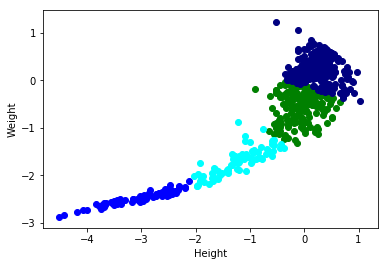

In [25]:
color = ["blue", "green", "navy", "cyan", "purple"]
for k in range(5):
    data = frame[frame["cluster"]  == k + 1]
    plt.scatter(data[0], data[1], c=color[k])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()